### PRiAD - Projekt: Analiza Eksploracyjna Danych  
**Stanisław Dutkiewicz, Piotr Szepietowski**  
**Zbiór danych**: [Car Prices Poland](https://www.kaggle.com/datasets/aleksandrglotov/car-prices-poland/data)  
**Cel projektu**: Analiza eksploracyjna wybranego zbioru danych 

---

### 1. Wstępna analiza zbioru danych

W ramach projektu przeprowadzamy wstępną analizę zbioru danych, która obejmuje:

- Wyznaczenie łącznej liczby obiektów (obserwacji) w zbiorze danych.
- Sprawdzenie liczby unikalnych klas (np. marek samochodów, jeśli dotyczy).
- Wyznaczenie liczby obiektów w każdej klasie.
- Określenie liczby atrybutów (cech) w zbiorze danych.
- Zliczenie brakujących danych w każdej kolumnie.

W dalszej analizie usunięte zostaną obiekty, które zawierają brakujące dane, aby zapewnić spójność analiz. Poniżej znajduje się kod wykonujący powyższe zadania:


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie zbioru danych
df = pd.read_csv('Car_Prices_Poland_Kaggle.csv')

# Usunięcie kolumny 'Unnamed: 0', która jest zbędna
df.drop(columns=['Unnamed: 0'], inplace=True)

# Wyświetlenie pierwszych 5 wierszy danych
df.head()

# Liczba obiektów (obserwacji)
print(f"Liczba obiektów: {df.shape[0]}")

# Liczba klas (np. marek samochodów)
print(f"Liczba klas (marek): {df['mark'].nunique()}")

# Liczba obiektów w każdej klasie
print("\nLiczba obiektów w każdej klasie:")
print(df['mark'].value_counts())

# Liczba atrybutów (cech)
print(f"\nLiczba atrybutów: {df.shape[1]}")

# Liczba brakujących danych
print(f"\nLiczba brakujących danych: {df.isna().sum().sum()}")

# Usunięcie danych brakujących
df.dropna(inplace=True)

# Potwierdzenie liczby obiektów po usunięciu braków danych
print(f"\nLiczba obiektów po usunięciu brakujących danych: {df.shape[0]}")


Liczba obiektów: 117927
Liczba klas (marek): 23

Liczba obiektów w każdej klasie:
audi             12031
opel             11914
bmw              11070
volkswagen       10848
ford              9664
mercedes-benz     7136
renault           6976
skoda             5888
toyota            5120
peugeot           5056
volvo             4384
hyundai           4032
kia               3744
nissan            3072
fiat              2880
mazda             2848
seat              2848
citroen           2720
honda             2176
mitsubishi        1120
mini              1088
alfa-romeo         704
chevrolet          608
Name: mark, dtype: int64

Liczba atrybutów: 10

Liczba brakujących danych: 30085

Liczba obiektów po usunięciu brakujących danych: 87842


---
### 2. Analiza zmienności atrybutów

W tej części projektu analizujemy zmienność poszczególnych atrybutów:

- Globalnie, w całym zbiorze danych.
- W podziale na klasy (marki samochodów).

Wyniki przedstawiono na odpowiednich wykresach. Poniżej znajduje się kod wykorzystany do analizy.


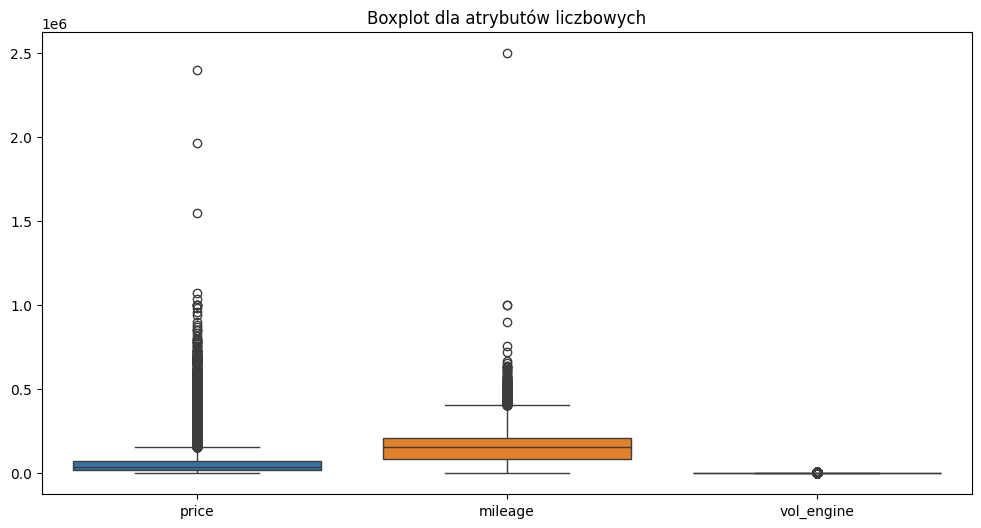

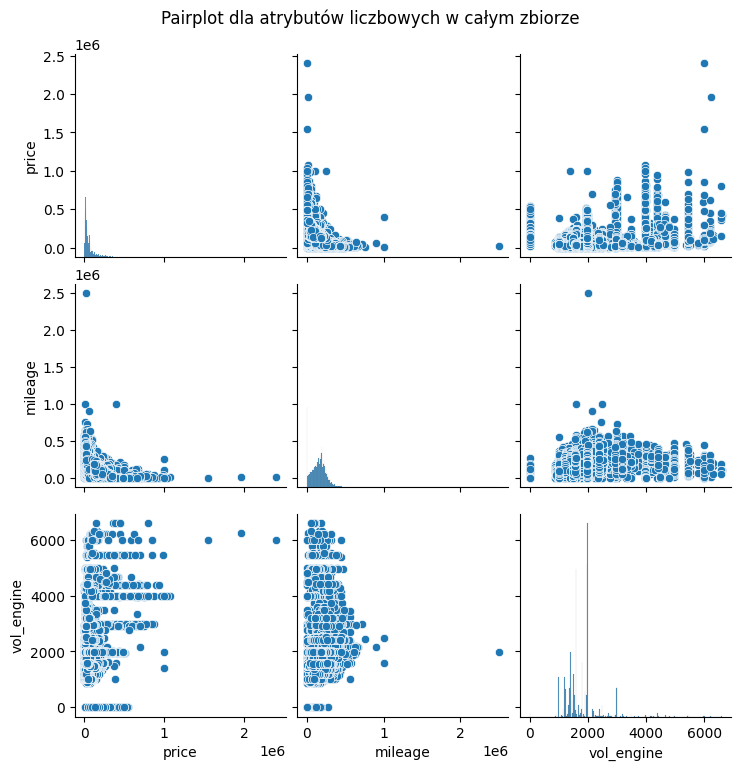

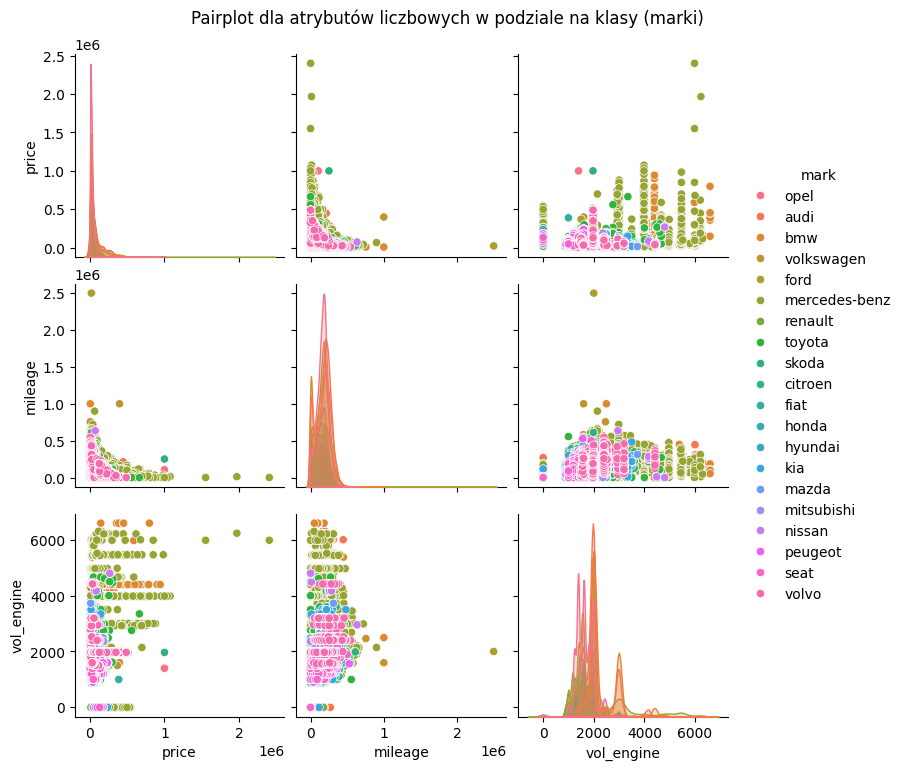

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot dla wszystkich danych liczbowych
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['price', 'mileage', 'vol_engine']])
plt.title("Boxplot dla atrybutów liczbowych")
plt.show()

# Pairplot dla atrybutów liczbowych
sns.pairplot(df[['price', 'mileage', 'vol_engine']])
plt.suptitle("Pairplot dla atrybutów liczbowych w całym zbiorze", y=1.02)
plt.show()

# Pairplot w podziale na klasy (marki samochodów)
sns.pairplot(df[['price', 'mileage', 'vol_engine', 'mark']], hue='mark')
plt.suptitle("Pairplot dla atrybutów liczbowych w podziale na klasy (marki)", y=1.02)
plt.show()


### Wnioski do punktu 2

* **Zadanie 2 - wnioski**  
  - Największą zmienność w całym zbiorze wykazuje atrybut `price` (cena), co widać na boxplotach.  
  - Atrybut `mileage` (przebieg) ma najbardziej porozrzucane dane, co utrudnia jego interpretację.  
  - Pomiędzy atrybutami `price` i `mileage` widać umiarkowaną zależność – większy przebieg często wiąże się z niższą ceną.  
  - W przypadku pairplotów w podziale na marki (`mark`), marki premium (np. BMW, Mercedes) mają wyraźnie wyższe ceny w porównaniu do marek budżetowych.  
  - Większość marek wykazuje rozrzut danych, ale brak wyraźnego rozgraniczenia pomiędzy ich atrybutami liczbowymi.  



---
### 3. Analiza korelacji i zdolności rozróżnienia klas

W tej części projektu analizujemy:
1. Stopień korelacji pomiędzy poszczególnymi atrybutami liczbowymi.
2. W jakim stopniu poszczególne cechy (np. `price`, `mileage`, `vol_engine`) umożliwiają rozróżnienie klas (marek samochodów).


C:\Users\Stasd\AppData\Local\Temp\ipykernel_26628\1305545120.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


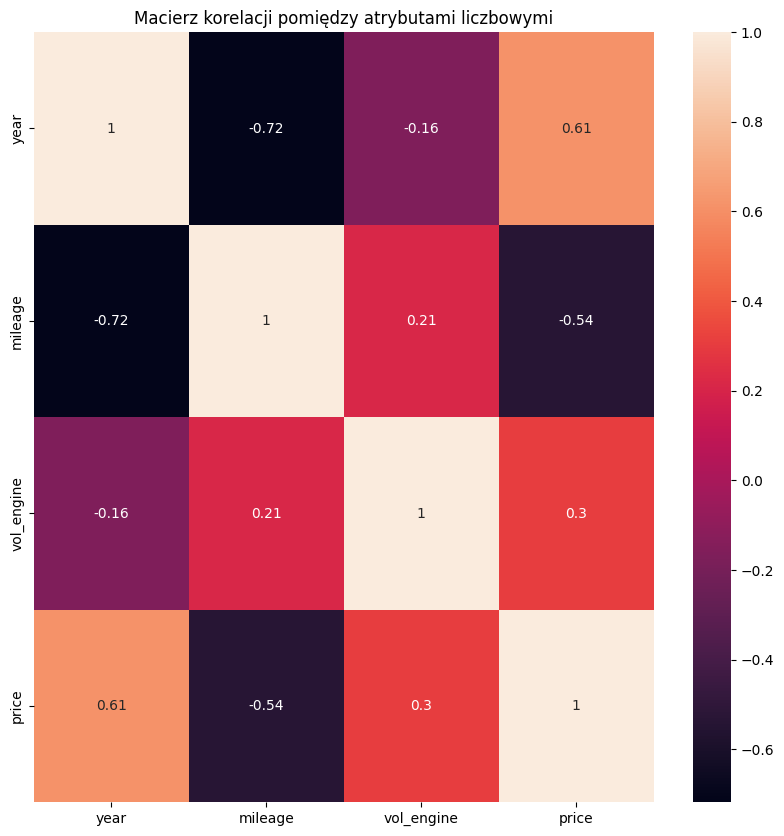

In [ ]:

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title("Macierz korelacji pomiędzy atrybutami liczbowymi")
plt.show()



### Wnioski do punktu 3

* **Zadanie 3 - wnioski**  
  - Najsilniej skorelowane dodatnio są atrybuty `price` (cena) i `year` (rok produkcji) z wartością korelacji **0.61**.
  - Najsilniejsza korelacja ujemna występuje między `year` (rok produkcji) a `mileage` (przebieg) z wartością korelacji **-0.72**.
  - Atrybuty `price`, `year`, i `vol_engine` (pojemność silnika) wykazują największy potencjał do rozróżniania klas (marek), co widać w ich rozkładach.
  - Atrybut `mileage` (przebieg) charakteryzuje się umiarkowaną korelacją z innymi cechami i może mieć mniejsze znaczenie w rozróżnianiu klas.

Macierz korelacji oraz boxploty potwierdzają, że kluczowymi cechami różnicującymi klasy są `price`, `year` oraz `vol_engine`, podczas gdy `mileage` ma bardziej rozproszony charakter.


---
### 4. Analiza nadmiarowości cech

W tej części projektu oceniamy, które atrybuty (zmienne) można uznać za nadmiarowe, wykorzystując wcześniej wygenerowaną macierz korelacji. Usunięcie nadmiarowych cech może uprościć dalsze analizy i zwiększyć efektywność modeli.

C:\Users\Stasd\AppData\Local\Temp\ipykernel_26628\1254033524.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


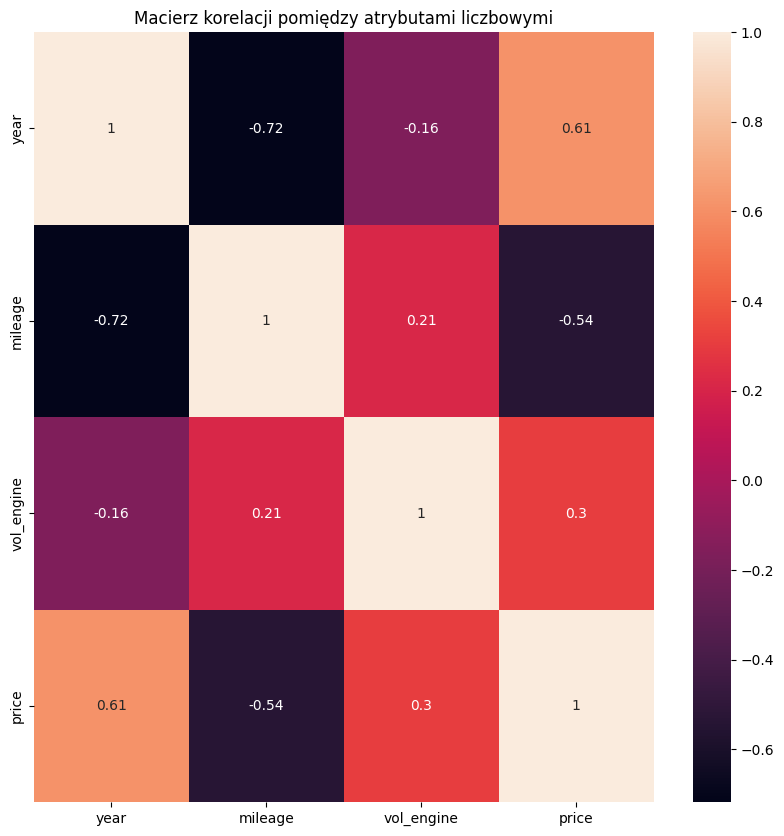

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title("Macierz korelacji pomiędzy atrybutami liczbowymi")
plt.show()


### Wnioski do punktu 4

* **Zadanie 4 - wnioski**
  - Można za nadmiarowy uznać jeden z atrybutów `price` (cena) lub `year` (rok produkcji), ponieważ ich korelacja wynosi **0.60**, co oznacza, że rok produkcji częściowo tłumaczy zmienność ceny.
  - Atrybuty `price` i `vol_engine` (pojemność silnika) są umiarkowanie skorelowane (**0.30**), ale nie wskazuje to jednoznacznie na nadmiarowość.
  - Atrybut `mileage` (przebieg) jest odwrotnie skorelowany z `year` (**-0.72**) oraz `price` (**-0.54**). Mimo tego wnosi dodatkową wartość analityczną i nie należy go usuwać.
  - Ogólnie, żaden atrybut nie jest jednoznacznie nadmiarowy, ale warto rozważyć, czy `year` i `price` są równocześnie potrzebne w pełnej analizie.
